<a href="https://colab.research.google.com/github/anyaconda/myStats/blob/master/daniel_SpearmanSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spearman Simulation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import spearmanr

In [2]:
true_target = np.arange(0,5000) / 4999
label = []

dist = {0:250,
       0.25:1000,
       0.5:2500,
       0.75:1000,
       1:250}

for lab, rep in dist.items():
    label.extend([lab]*rep)
label = np.array(label)
label.min(), label.max(), label.mean()

(0.0, 1.0, 0.5)

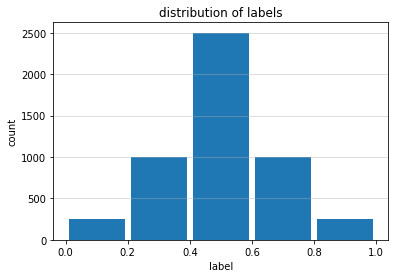

In [3]:
plt.hist(label, bins=5, rwidth=0.9)
plt.xlabel('label')
plt.ylabel('count')
plt.title('distribution of labels')
plt.grid(axis='y', alpha=0.5)

# Some Simple Test Cases
## Case 1: Exactly correct predictions
This is just to make sure the most obvious case works as anticipated.

In [4]:
preds = np.arange(0,5000) / 4999
spearmanr(preds, true_target)

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

## Case 2: Randomized
Another mostly-obvious case. What degree of ordering could we expect by shuffling our predictions?

In [5]:
preds = np.arange(0,5000) / 4999
shuffle_corr = []
for i in range(5000):
    np.random.shuffle(preds)
    shuffle_corr.append(spearmanr(preds,true_target)[0])  
    

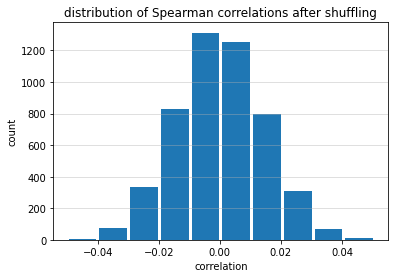

In [6]:
shuffle_corr = np.array(shuffle_corr)
plt.hist(shuffle_corr, bins=10, rwidth=0.9)
plt.xlabel('correlation')
plt.ylabel('count')
plt.title('distribution of Spearman correlations after shuffling')
plt.grid(axis='y', alpha=0.5)

Now we have the simplest of baselines. The spearman correlation of an ordered array with itself is 1; the average spearman correlation of an ordered array with that same array randomly shuffled is zero.

## Case 3: identical results by label

What happens if we try to get the correlation with only five values? Basically, if the labels (0, 0.25, ..., 1) are the predictions?

In [7]:
preds = label
spearmanr(preds, true_target)

SpearmanrResult(correlation=0.9266876681762855, pvalue=0.0)

Interesting -- still an extremely high correlation, but not exactly 1.

Now the real question: what if the results *within each label* are shuffled? That is, if we correctly predict each label, but then within each label we randomly order the results? Let's construct a DataFrame to better visualize.

In [8]:
labelcat = pd.Categorical(label)
df = pd.DataFrame({'Label':labelcat, 'true_target':true_target, 'pred':np.zeros_like(true_target)})

In [9]:
pred = []
for label in df.Label.unique():
    ordered = df.loc[df.Label==label, 'true_target']
    shuffled = list(ordered)
    np.random.shuffle(shuffled)
    pred.extend(shuffled)

The below test show that `pred` is not ordered, BUT that the preds in each category are lower than the preds in each subsequent category. (not comprehensive)

In [10]:
all(pred[i] <= pred[i+1] for i in range(len(pred)-1)), np.all(pred[0:250] < pred[250:1250]), np.mean(pred[0:250]), np.mean(pred[4250:])

(False, True, 0.024904980996199238, 0.8912403814096151)

Let's try this shuffling process a bunch of times and take the correlations.

In [11]:
df = pd.DataFrame({'Label':labelcat, 'true_target':true_target})
corrs = []
for i in range(5000):
    pred=[]
    for label in df.Label.unique():
        ordered = df.loc[df.Label==label, 'true_target']
        shuffled = list(ordered)
        np.random.shuffle(shuffled)
        #np.flip(shuffled)
        pred.extend(shuffled)
    corrs.append(spearmanr(pred,true_target)[0])

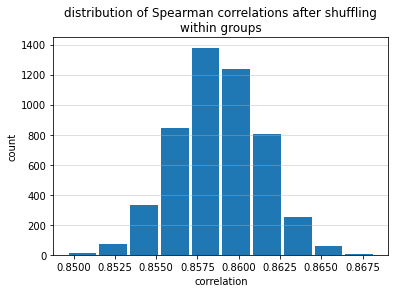

In [12]:
group_shuffle_corr = np.array(corrs)
plt.hist(group_shuffle_corr, bins=10, rwidth=0.9)
plt.xlabel('correlation')
plt.ylabel('count')
plt.title('distribution of Spearman correlations after shuffling\nwithin groups')
plt.grid(axis='y', alpha=0.5)

In [13]:
np.mean(corrs)

0.8587622829337935

# Using only Two Categories

In [14]:
true_target = np.arange(0,5000) / 4999
label = []

dist = {'low': 3500,
        'high':1500}

for lab, rep in dist.items():
    label.extend([lab]*rep)
label = np.array(label)
label

array(['low', 'low', 'low', ..., 'high', 'high', 'high'], dtype='<U4')

In [15]:
labelcat = pd.Categorical(label)
df = pd.DataFrame({'Label':labelcat, 'true_target':true_target})
corrs = []
for i in range(5000):
    pred=[]
    for label in df.Label.unique():
        ordered = df.loc[df.Label==label, 'true_target']
        shuffled = list(ordered)
        np.random.shuffle(shuffled)
        #np.flip(shuffled)
        pred.extend(shuffled)
    corrs.append(spearmanr(pred,true_target)[0])

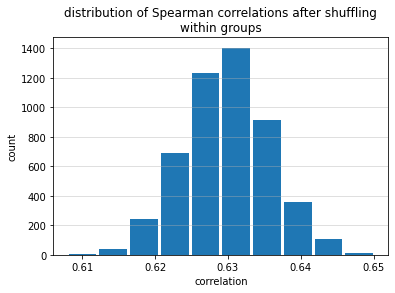

In [16]:
group_shuffle_corr = np.array(corrs)
plt.hist(group_shuffle_corr, bins=10, rwidth=0.9)
plt.xlabel('correlation')
plt.ylabel('count')
plt.title('distribution of Spearman correlations after shuffling\nwithin groups')
plt.grid(axis='y', alpha=0.5)

In [17]:
np.mean(group_shuffle_corr)

0.6298791695215156